## The following code depends on libraires:
1. pip install imutils
2. pip install easyocr

In [1]:
import os
import re
import cv2
import imutils
import easyocr
import numpy as np
import matplotlib.pyplot as plt

x: 240, y: 0, w: 2320, h: 1755
masked_image: (1920, 2560, 3)
cropped_roi: (1755, 2320, 3)
img: (1920, 2560, 3)


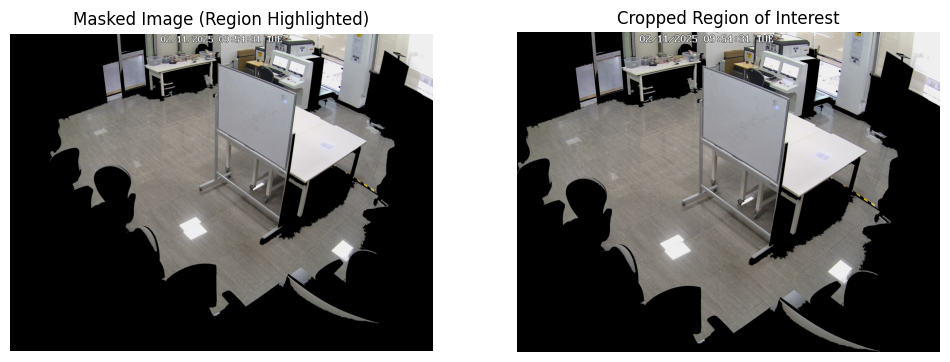

In [3]:
def extract_number_region(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours to detect the number area
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the bounding box for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    print(f"x: {x}, y: {y}, w: {w}, h: {h}")

    # Create a mask of the same size as the image, filled with black
    mask = np.zeros_like(image)

    # Draw the largest contour on the mask (white for the region of interest)
    cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Mask the original image
    masked_image = cv2.bitwise_and(image, mask)

    # Crop the region of interest (numbers only)
    cropped_roi = masked_image[y:y+h, x:x+w]

    return masked_image, cropped_roi, image

# Example usage

# Read in Image, Grayscale and Blur
# image_path = r"./images/id_number.png"
image_path = r"./images/Xray0017 C1-20250211_095433.jpg"
masked_image, cropped_roi, img = extract_number_region(image_path)
print(f"masked_image: {masked_image.shape}\ncropped_roi: {cropped_roi.shape}\nimg: {img.shape}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Masked Image (Region Highlighted)")
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Cropped Region of Interest")
plt.imshow(cv2.cvtColor(cropped_roi, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_roi)
print(f'result: {result}')

# result: [([[118, 164], [1052, 164], [1052, 332], [118, 332]], '100044698', 0.8031785798293574)]
# Top-left: [118, 164]
# Top-right: [1052, 164]
# Bottom-right: [1052, 332]
# Bottom-left: [118, 332]
bbox = result[0][0]
print(f'bbox: {bbox}')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


result: [([[664, 0], [1288, 0], [1288, 73], [664, 73]], '02/11/2025 09854831', 0.8914399544874899), ([[1307, 10], [1415, 10], [1415, 65], [1307, 65]], 'TVE', 0.732314456231143)]
bbox: [[664, 0], [1288, 0], [1288, 73], [664, 73]]


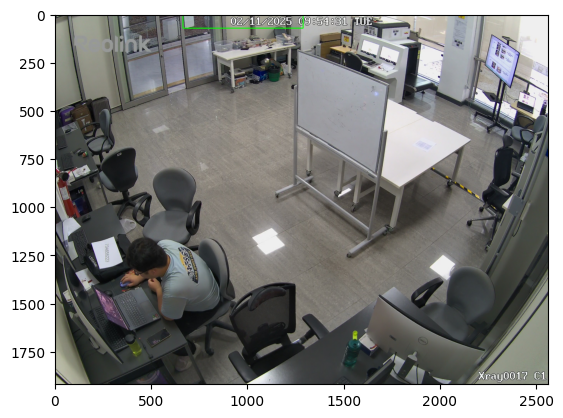

In [5]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(bbox[0][0], bbox[0][1]-10), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()